In [1]:
import pandas as pd
import numpy as np
import Utility as util


#read and parse the .csv features file for A1-turbine normalized data
df = pd.read_csv('Normalized Data/A1-turbine_normalized.txt', delimiter = '\t')
df.head()



,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
0,0.8462,0.8212,0.8488,0.0833,0.1500
1,0.9487,0.9226,0.9468,0.0833,0.1627
2,0.2821,0.2803,0.2764,0.5833,0.3712
3,0.2051,0.2042,0.2028,0.5833,0.3304
4,1.0000,0.9614,0.9413,0.8333,0.8948


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   #height_over_sea_level            451 non-null    float64
 1   fall                              451 non-null    float64
 2   net_fall                          451 non-null    float64
 3   flow                              451 non-null    float64
 4   power_of_hydroelectrical_turbine  451 non-null    float64
dtypes: float64(5)
memory usage: 17.7 KB


In [3]:
df.describe()

,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
count,451.000000,451.000000,451.000000,451.000000,451.000000
mean,0.535221,0.516427,0.523289,0.486881,0.392635
std,0.284318,0.272583,0.271364,0.297155,0.250617
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.307700,0.306350,0.302450,0.250000,0.185400
50%,0.538500,0.508600,0.521500,0.500000,0.360500
75%,0.794900,0.757850,0.760800,0.750000,0.577500
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
columns = df.shape[1]

# construct an array of arrays size (451, 4) for all features input values
inputcolumns = df.columns[0 : 4]
features = df[inputcolumns].values

# construct an array of size (451) for all features target values
outputcolumn = df.columns[4]
targets = df[outputcolumn].values

print(features.shape)
print(targets.shape)


(451, 4)
(451,)


In [5]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.15, random_state= 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(383, 4)
(68, 4)
(383,)
(68,)


In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, activation="sigmoid"),
    tf.keras.layers.Dense(5, activation="sigmoid"),
    tf.keras.layers.Dense(1),
])

sgd = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=sgd, loss = "mse", metrics=["mae"])
model.fit(x_train, y_train, epochs=100, verbose="2")


for i in range(0 , len(model.layers)):
    weights = model.layers[i].weights
    print(weights)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [7]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

#print(y_pred_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R2 score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))

print("R2 score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))

12/12 [==============================] - 0s 2ms/step
R2 score:  0.94658647726621
MSE:  0.0030102692982713164
MAE:  0.038940062708714425
R2 score:  0.9387238027613787
MSE:  0.0038690735023839467
MAE:  0.04569615490193778


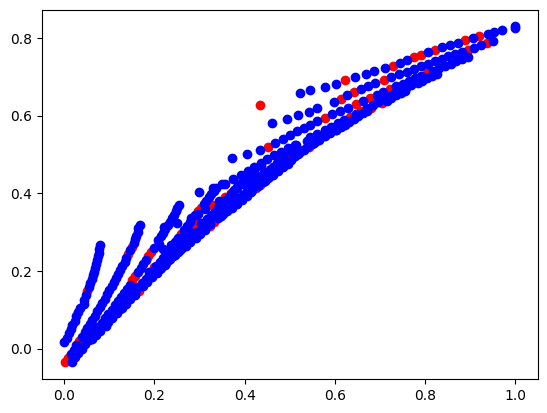

In [8]:
# scatterplot of predicted vs actual values
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred_test, color = 'red')
plt.scatter(y_train, y_pred_train, color = 'blue')
